#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Combine datasets 

In [2]:
# gather all csv files
df1 = pd.read_csv('learn-html-pro.csv')
df2 = pd.read_csv('learnhtmlpro-sa.csv')

In [3]:
df1.head(10)

,name,star_rating,date,review,people,device
0,jereld camphor,5,"August 23, 2020",It is an excellent app. It provides a practica...,79,Phone
1,Harrison H,5,"October 30, 2020",So far I like the app a lot. It may not look a...,130,Phone
2,Julio LH,4,"December 6, 2024",A great resource for learning HTML or brushing...,None,Phone
3,Cecile Perret,5,"October 19, 2020",I really like this app and its partner apps (c...,40,Phone
4,Cathy Furman,4,"February 19, 2023","App works well, some bugs here and there with ...",17,Phone
5,Daniel Dolan,5,"May 20, 2020",Very easy and simple way of learning HTML5. Fa...,18,Phone
6,Diego Schelling,5,"December 31, 2020",Great experience with this app. I have pretty ...,29,Phone
7,A Google user,5,"April 27, 2020",So far this app has been excellent in teaching...,2,Phone
8,Sirena E,5,"November 24, 2022",Great app and I learned even more about html t...,2,Phone
9,Augusto Pietroski,5,"May 6, 2020",The most addictive programming learning app of...,9,Phone


In [4]:
df2.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment_result,sentiment_label,sentiment_score
0,27722653-2923-409c-844a-73cfad4e6271,Julio LH,https://play-lh.googleusercontent.com/a-/ALV-U...,A great resource for learning HTML or brushing...,4,0,1.4.4,2024-12-06 01:34:09,NaN,NaN,1.4.4,"[{'label': 'POSITIVE', 'score': 0.998741209506...",POSITIVE,0.998741
1,2660ea1f-4e38-47a1-bfbd-ba124a44bd4b,Dylan Smith,https://play-lh.googleusercontent.com/a/ACg8oc...,It taught me tables as I casually browsed the ...,5,0,NaN,2024-07-26 13:27:31,NaN,NaN,NaN,"[{'label': 'POSITIVE', 'score': 0.998786866664...",POSITIVE,0.998787
2,e0b8e27d-4d3c-422a-9aa0-0de69a089db2,Usama Abubakar,https://play-lh.googleusercontent.com/a-/ALV-U...,Thank you 🙏,5,0,1.4.4,2024-07-23 10:10:38,NaN,NaN,1.4.4,"[{'label': 'POSITIVE', 'score': 0.998811364173...",POSITIVE,0.998811
3,35535390-f184-4a37-b615-ec012dd81917,Gareth Andrew Wood,https://play-lh.googleusercontent.com/a/ACg8oc...,"This is excellent, really love it. Clear and e...",5,0,1.4.4,2024-05-21 13:27:44,NaN,NaN,1.4.4,"[{'label': 'POSITIVE', 'score': 0.998936235904...",POSITIVE,0.998936
4,62832b2d-0758-4aed-be67-9982503cd085,Han Sak,https://play-lh.googleusercontent.com/a-/ALV-U...,Good 👍👍👍,5,0,1.4.4,2024-02-01 17:23:39,NaN,NaN,1.4.4,"[{'label': 'POSITIVE', 'score': 0.998515427112...",POSITIVE,0.998515


In [5]:
df2['reviewCreatedVersion'].value_counts()

1.4.4    39
1.4.1    19
1.3.9    15
1.3.7     6
1.3.4     4
1.4.2     3
1.3.2     3
1.2.6     2
1.1.1     2
1.3.5     1
1.3.3     1
1.3.0     1
1.1.3     1
1.0.3     1
Name: reviewCreatedVersion, dtype: int64

In [6]:
df2['appVersion'].value_counts()

1.4.4    39
1.4.1    19
1.3.9    15
1.3.7     6
1.3.4     4
1.4.2     3
1.3.2     3
1.2.6     2
1.1.1     2
1.3.5     1
1.3.3     1
1.3.0     1
1.1.3     1
1.0.3     1
Name: appVersion, dtype: int64

In [7]:
df1.dtypes

name           object
star_rating     int64
date           object
review         object
people         object
device         object
dtype: object

In [8]:
# ensure object datatype of 'review' is string
df1['review'] = df1['review'].astype('str')

In [9]:
# perform inner join on review-content as the common columns
df = df1.merge(df2[['userName','reviewCreatedVersion','sentiment_label','sentiment_score','content','reviewId']], left_on='review', right_on='content', how='inner')

In [10]:
# re-assess dataframe
df

,name,star_rating,date,review,people,device,userName,reviewCreatedVersion,sentiment_label,sentiment_score,content,reviewId
0,jereld camphor,5,"August 23, 2020",It is an excellent app. It provides a practica...,79,Phone,jereld camphor,1.3.4,POSITIVE,0.998888,It is an excellent app. It provides a practica...,37ced158-8ab4-47d7-837f-a0aee213fd8c
1,Harrison H,5,"October 30, 2020",So far I like the app a lot. It may not look a...,130,Phone,Harrison H,1.3.7,POSITIVE,0.998929,So far I like the app a lot. It may not look a...,1c03e4e9-c29a-4bdb-aa0e-1360b63842c7
2,Julio LH,4,"December 6, 2024",A great resource for learning HTML or brushing...,None,Phone,Julio LH,1.4.4,POSITIVE,0.998741,A great resource for learning HTML or brushing...,27722653-2923-409c-844a-73cfad4e6271
3,Cecile Perret,5,"October 19, 2020",I really like this app and its partner apps (c...,40,Phone,Cecile Perret,1.3.7,POSITIVE,0.998935,I really like this app and its partner apps (c...,f1fc09c7-b3c1-46fa-833b-ba07d2f67eb6
4,Cathy Furman,4,"February 19, 2023","App works well, some bugs here and there with ...",17,Phone,Cathy Furman,1.4.4,POSITIVE,0.998915,"App works well, some bugs here and there with ...",c06a6a0b-0a83-427c-bf67-6b981a4b8589
...,...,...,...,...,...,...,...,...,...,...,...,...
110,Astro Biological,5,"June 24, 2023",This app has been a huge help in my learning j...,1,Tablet,Astro Biological,1.4.4,POSITIVE,0.998798,This app has been a huge help in my learning j...,98489830-c94c-4e4b-935a-afc959ce6863
111,Thomas Tom,4,"August 22, 2021",Je suis content pour cette app. But how do you...,7,Tablet,Thomas Tom,1.4.1,NEGATIVE,0.998142,Je suis content pour cette app. But how do you...,4bc2334c-3aac-433f-8e35-9c2a5fe8c71d
112,Jason Collins,5,"August 11, 2022",Actually quite good,None,Tablet,Jason Collins,1.4.4,POSITIVE,0.998018,Actually quite good,2c6c699d-3fe1-44c9-b31f-0c6dee8d2566
113,philip kemp,5,"July 6, 2020",Exceptional App,1,Tablet,philip kemp,1.3.4,POSITIVE,0.998577,Exceptional App,f83a6006-9031-4ad4-a6d7-add0317d6101


In [11]:
# sum of duplicates in parent df1
df1['review'].duplicated().sum()

3

In [12]:
# sum of duplicates in parent df2
df2['content'].duplicated().sum()

3

In [13]:
# view duplicates in merged dataframe
print(df[df['review'].duplicated()])

                  name  star_rating              date     review people  \
89   Trevor Fitzgerald            5  January 31, 2021  Very good      1   
90   Trevor Fitzgerald            5  January 31, 2021  Very good      1   
91   Trevor Fitzgerald            5  January 31, 2021  Very good      1   
92        Chris Arranz            5  February 9, 2021  Very good      1   
93        Chris Arranz            5  February 9, 2021  Very good      1   
94        Chris Arranz            5  February 9, 2021  Very good      1   
95        Chris Arranz            5  February 9, 2021  Very good      1   
96       JUSTICE AWIAH            5  December 6, 2020  Very good      1   
97       JUSTICE AWIAH            5  December 6, 2020  Very good      1   
98       JUSTICE AWIAH            5  December 6, 2020  Very good      1   
99       JUSTICE AWIAH            5  December 6, 2020  Very good      1   
100      Digital World            5      July 6, 2020  Very good      1   
101      Digital World   

In [14]:
# check for duplicate names in the merged dataframe
df['name'].duplicated().sum()

20

In [15]:
# check for duplicate names in the old df1
df1['name'].duplicated().sum()

8

In [16]:
# check for duplicate names in the old df2
df2['userName'].duplicated().sum()

8

In [17]:
# check count of values in `people` column
df['people'].value_counts()

None    41
1       30
2       11
7        6
4        5
5        3
9        3
17       2
3        2
8        2
79       1
14       1
12       1
11       1
15       1
130      1
29       1
18       1
40       1
10       1
Name: people, dtype: int64

In [18]:
# check for null values
df['reviewCreatedVersion'].isna().sum()

5

In [19]:
# view all rows with the anonymous name 'A Google User'
print(df1[df1['name'] == 'A Google user'])

              name  star_rating               date  \
7    A Google user            5     April 27, 2020   
18   A Google user            5   January 31, 2020   
20   A Google user            5  December 30, 2018   
30   A Google user            5   October 29, 2019   
35   A Google user            5       May 11, 2019   
37   A Google user            5     April 14, 2020   
93   A Google user            5        May 7, 2019   
102  A Google user            5      June 25, 2019   

                                                review people  device  
7    So far this app has been excellent in teaching...      2   Phone  
18   Edit: completed this course and using it still...      7   Phone  
20   Best app to learn HTML. I love the Try It Your...      9   Phone  
30   Very good for Beginners in Web Development. Cl...      4   Phone  
35   Well paced lessons with relevant quizzes throu...      4   Phone  
37                Great interface and content to learn      5   Phone  
93       

In [20]:
df['reviewCreatedVersion'].dtype

dtype('O')

## Quality Issues
**Merged `df` table**
1. Duplicated rows
2. Duplicated columns
3. Unrefined column names and spelling
4. Capitalized values in column `sentiment_label`
5. Inconsistent word case of `name` values
6.  `None` instead of `NaN` for missing `people` data
7. `date` column is not a `datetime` datatype
8. Two columns, `reviewCreatedVersion` and `star_rating`, are not `string` datatype

## Cleaning

In [21]:
# save a copy of the dataframe
df_clean = df.copy()

### Quality Issue 1: Duplicated rows

#### Code:

In [22]:
# empty list of duplicated row indexes
d_index = []

# for loop to get a list of the duplicate row indexes
for i in range(len(df_clean)):
    if df_clean.iloc[i]['name'] == df_clean.iloc[i]['userName']:
        pass
    else:
        d_index.append(i)

print(d_index)

[88, 90, 91, 93, 94, 95, 96, 97, 99, 100, 101, 102]


In [23]:
# view row with index number 88 
print(df_clean.iloc[88])

name                                       Trevor Fitzgerald
star_rating                                                5
date                                        January 31, 2021
review                                             Very good
people                                                     1
device                                                 Phone
userName                                        Chris Arranz
reviewCreatedVersion                                   1.3.9
sentiment_label                                     POSITIVE
sentiment_score                                     0.998602
content                                            Very good
reviewId                828537ef-0cf4-4e7a-b824-f9622318755d
Name: 88, dtype: object


In [24]:
# view all rows with name 'Trevor Fitzgerald'
print(df_clean[df_clean['name']== 'Trevor Fitzgerald'])

                 name  star_rating              date     review people device  \
88  Trevor Fitzgerald            5  January 31, 2021  Very good      1  Phone   
89  Trevor Fitzgerald            5  January 31, 2021  Very good      1  Phone   
90  Trevor Fitzgerald            5  January 31, 2021  Very good      1  Phone   
91  Trevor Fitzgerald            5  January 31, 2021  Very good      1  Phone   

             userName reviewCreatedVersion sentiment_label  sentiment_score  \
88       Chris Arranz                1.3.9        POSITIVE         0.998602   
89  Trevor Fitzgerald                1.3.9        POSITIVE         0.998602   
90      JUSTICE AWIAH                1.3.9        POSITIVE         0.998602   
91      Digital World                1.3.4        POSITIVE         0.998602   

      content                              reviewId  
88  Very good  828537ef-0cf4-4e7a-b824-f9622318755d  
89  Very good  27ca7741-d289-4793-af5f-79b8e56fc8e5  
90  Very good  9af53e13-17d5-4df0-a8

In [25]:
# drop all the duplicated rows
df_clean.drop(index=d_index, inplace = True)
# test
df_clean

,name,star_rating,date,review,people,device,userName,reviewCreatedVersion,sentiment_label,sentiment_score,content,reviewId
0,jereld camphor,5,"August 23, 2020",It is an excellent app. It provides a practica...,79,Phone,jereld camphor,1.3.4,POSITIVE,0.998888,It is an excellent app. It provides a practica...,37ced158-8ab4-47d7-837f-a0aee213fd8c
1,Harrison H,5,"October 30, 2020",So far I like the app a lot. It may not look a...,130,Phone,Harrison H,1.3.7,POSITIVE,0.998929,So far I like the app a lot. It may not look a...,1c03e4e9-c29a-4bdb-aa0e-1360b63842c7
2,Julio LH,4,"December 6, 2024",A great resource for learning HTML or brushing...,None,Phone,Julio LH,1.4.4,POSITIVE,0.998741,A great resource for learning HTML or brushing...,27722653-2923-409c-844a-73cfad4e6271
3,Cecile Perret,5,"October 19, 2020",I really like this app and its partner apps (c...,40,Phone,Cecile Perret,1.3.7,POSITIVE,0.998935,I really like this app and its partner apps (c...,f1fc09c7-b3c1-46fa-833b-ba07d2f67eb6
4,Cathy Furman,4,"February 19, 2023","App works well, some bugs here and there with ...",17,Phone,Cathy Furman,1.4.4,POSITIVE,0.998915,"App works well, some bugs here and there with ...",c06a6a0b-0a83-427c-bf67-6b981a4b8589
...,...,...,...,...,...,...,...,...,...,...,...,...
110,Astro Biological,5,"June 24, 2023",This app has been a huge help in my learning j...,1,Tablet,Astro Biological,1.4.4,POSITIVE,0.998798,This app has been a huge help in my learning j...,98489830-c94c-4e4b-935a-afc959ce6863
111,Thomas Tom,4,"August 22, 2021",Je suis content pour cette app. But how do you...,7,Tablet,Thomas Tom,1.4.1,NEGATIVE,0.998142,Je suis content pour cette app. But how do you...,4bc2334c-3aac-433f-8e35-9c2a5fe8c71d
112,Jason Collins,5,"August 11, 2022",Actually quite good,None,Tablet,Jason Collins,1.4.4,POSITIVE,0.998018,Actually quite good,2c6c699d-3fe1-44c9-b31f-0c6dee8d2566
113,philip kemp,5,"July 6, 2020",Exceptional App,1,Tablet,philip kemp,1.3.4,POSITIVE,0.998577,Exceptional App,f83a6006-9031-4ad4-a6d7-add0317d6101


### Quality Issue 2: Duplicated Columns

#### Code:

In [26]:
# drop duplicate columns
df_clean.drop(['userName','content'], axis=1, inplace=True)

#### Test:

In [27]:
df_clean.head(5)

,name,star_rating,date,review,people,device,reviewCreatedVersion,sentiment_label,sentiment_score,reviewId
0,jereld camphor,5,"August 23, 2020",It is an excellent app. It provides a practica...,79,Phone,1.3.4,POSITIVE,0.998888,37ced158-8ab4-47d7-837f-a0aee213fd8c
1,Harrison H,5,"October 30, 2020",So far I like the app a lot. It may not look a...,130,Phone,1.3.7,POSITIVE,0.998929,1c03e4e9-c29a-4bdb-aa0e-1360b63842c7
2,Julio LH,4,"December 6, 2024",A great resource for learning HTML or brushing...,None,Phone,1.4.4,POSITIVE,0.998741,27722653-2923-409c-844a-73cfad4e6271
3,Cecile Perret,5,"October 19, 2020",I really like this app and its partner apps (c...,40,Phone,1.3.7,POSITIVE,0.998935,f1fc09c7-b3c1-46fa-833b-ba07d2f67eb6
4,Cathy Furman,4,"February 19, 2023","App works well, some bugs here and there with ...",17,Phone,1.4.4,POSITIVE,0.998915,c06a6a0b-0a83-427c-bf67-6b981a4b8589


### Quality Issue 3: Unrefined column names and spelling

#### Code:

In [28]:
# rename old column names with pandas `rename` method
df_clean.rename(columns={'name':'username', 'review':'review_content','people':'thumbsup','reviewCreatedVersion':'app_version','reviewId':'review_id'}, inplace = True)

#### Test

In [29]:
df_clean.head(5)

,username,star_rating,date,review_content,thumbsup,device,app_version,sentiment_label,sentiment_score,review_id
0,jereld camphor,5,"August 23, 2020",It is an excellent app. It provides a practica...,79,Phone,1.3.4,POSITIVE,0.998888,37ced158-8ab4-47d7-837f-a0aee213fd8c
1,Harrison H,5,"October 30, 2020",So far I like the app a lot. It may not look a...,130,Phone,1.3.7,POSITIVE,0.998929,1c03e4e9-c29a-4bdb-aa0e-1360b63842c7
2,Julio LH,4,"December 6, 2024",A great resource for learning HTML or brushing...,None,Phone,1.4.4,POSITIVE,0.998741,27722653-2923-409c-844a-73cfad4e6271
3,Cecile Perret,5,"October 19, 2020",I really like this app and its partner apps (c...,40,Phone,1.3.7,POSITIVE,0.998935,f1fc09c7-b3c1-46fa-833b-ba07d2f67eb6
4,Cathy Furman,4,"February 19, 2023","App works well, some bugs here and there with ...",17,Phone,1.4.4,POSITIVE,0.998915,c06a6a0b-0a83-427c-bf67-6b981a4b8589


### Quality Issue 4: Capitalized values in column `sentiment_label`

#### Code:

In [30]:
# set sentiment labels to all lower case
df_clean['sentiment_label'] = df_clean['sentiment_label'].apply(lambda x: (x.lower()))

#### Test:

In [31]:
df_clean.sample(5)

,username,star_rating,date,review_content,thumbsup,device,app_version,sentiment_label,sentiment_score,review_id
62,Ellis Franklin Jr,5,"August 9, 2022",Great way to learn.,None,Phone,1.4.1,positive,0.998795,86b62a05-82f2-4743-b204-98ffdfd554e0
111,Thomas Tom,4,"August 22, 2021",Je suis content pour cette app. But how do you...,7,Tablet,1.4.1,negative,0.998142,4bc2334c-3aac-433f-8e35-9c2a5fe8c71d
15,Terrell Grissett,5,"February 18, 2022",I feel like it's definitely helping my learnin...,7,Phone,1.4.1,positive,0.998912,dbb43968-2b24-4936-a876-46f259ebef9b
20,A Google user,5,"December 30, 2018",Best app to learn HTML. I love the Try It Your...,9,Phone,1.0.3,positive,0.998890,3885a94a-c68a-47cc-970f-5a8a34128e64
58,jonathan ndawula,5,"June 26, 2021",Amazing app to build coding skill,4,Phone,1.4.1,positive,0.998862,c05e5709-70f7-4fbb-8b61-485c78ee27d8


### Quality Issue 5: Inconsistent word case of `username` values

#### Code:

In [32]:
# set usernames to title case
df_clean['username'] = df_clean['username'].apply(lambda x: (x.title()))

#### Test:

In [33]:
df_clean.sample(5)

,username,star_rating,date,review_content,thumbsup,device,app_version,sentiment_label,sentiment_score,review_id
87,Darko,5,"November 9, 2021",Super,None,Phone,1.4.1,positive,0.998575,6a1b37ac-4a21-454f-8cdf-a25c409c90c7
79,Zitro,5,"May 11, 2023",Great app,None,Phone,1.4.4,positive,0.998703,edcb0805-d6b4-4b21-b2f2-1695f0c50742
10,Mckinley Abiera,5,"September 3, 2021",It's very nice app that's really helps users t...,17,Phone,1.4.1,positive,0.998926,cebb35e6-929d-4823-93e9-6fb8ed2a8579
57,Brian P. Morrissey,5,"February 24, 2021",Free app so 5 stars (so far),1,Phone,1.3.9,positive,0.998601,79f81c3a-def8-4096-b33b-6cde696b2709
36,Olawale Oludare,5,"July 8, 2020",One of the best i've ever seen. It made progra...,8,Phone,1.3.4,positive,0.998849,f360a0ca-5bc5-43a0-81a0-0e595e9176a1


### Quality Issue 6: `None` instead of `NaN` for missing `thumbsup` data

#### Code:

In [34]:
# replace 'None' with Numpy nan
df_clean['thumbsup'] = df_clean['thumbsup'].replace({'None':np.nan})

#### Test:

In [35]:
df_clean.sample(5)

,username,star_rating,date,review_content,thumbsup,device,app_version,sentiment_label,sentiment_score,review_id
12,Michael “Lonewulf3457” Barske,5,"January 16, 2023",A wealth of knowledge at either no cost or an ...,2,Phone,1.4.4,positive,0.998864,83340411-4553-4b6b-b217-bf78a2f0772e
36,Olawale Oludare,5,"July 8, 2020",One of the best i've ever seen. It made progra...,8,Phone,1.3.4,positive,0.998849,f360a0ca-5bc5-43a0-81a0-0e595e9176a1
69,Sophanit Ret,5,"March 28, 2021",I love this app so much 💞😻,1,Phone,1.3.9,positive,0.998874,28412a65-388b-4e2b-a911-a8270466e103
3,Cecile Perret,5,"October 19, 2020",I really like this app and its partner apps (c...,40,Phone,1.3.7,positive,0.998935,f1fc09c7-b3c1-46fa-833b-ba07d2f67eb6
40,F Twn,4,"September 24, 2023",Very nice app worth the pro premium price,1,Phone,NaN,positive,0.998866,b0320d58-0932-4210-b6bf-b60e176d3a58


In [36]:
df_clean['thumbsup'].isna().sum()

41

### Quality Issue 7: `date` column is not a `datetime` datatype

#### Code:

In [37]:
# set to `datetime` format
df_clean['date'] = pd.to_datetime(df_clean['date'])

#### Test:

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 114
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   username         103 non-null    object        
 1   star_rating      103 non-null    int64         
 2   date             103 non-null    datetime64[ns]
 3   review_content   103 non-null    object        
 4   thumbsup         62 non-null     object        
 5   device           103 non-null    object        
 6   app_version      98 non-null     object        
 7   sentiment_label  103 non-null    object        
 8   sentiment_score  103 non-null    float64       
 9   review_id        103 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 8.9+ KB


In [39]:
df_clean.head(5)

,username,star_rating,date,review_content,thumbsup,device,app_version,sentiment_label,sentiment_score,review_id
0,Jereld Camphor,5,2020-08-23,It is an excellent app. It provides a practica...,79,Phone,1.3.4,positive,0.998888,37ced158-8ab4-47d7-837f-a0aee213fd8c
1,Harrison H,5,2020-10-30,So far I like the app a lot. It may not look a...,130,Phone,1.3.7,positive,0.998929,1c03e4e9-c29a-4bdb-aa0e-1360b63842c7
2,Julio Lh,4,2024-12-06,A great resource for learning HTML or brushing...,NaN,Phone,1.4.4,positive,0.998741,27722653-2923-409c-844a-73cfad4e6271
3,Cecile Perret,5,2020-10-19,I really like this app and its partner apps (c...,40,Phone,1.3.7,positive,0.998935,f1fc09c7-b3c1-46fa-833b-ba07d2f67eb6
4,Cathy Furman,4,2023-02-19,"App works well, some bugs here and there with ...",17,Phone,1.4.4,positive,0.998915,c06a6a0b-0a83-427c-bf67-6b981a4b8589


### Quality Issue 8: Two columns, `app_version` and `star_rating`, are not `string` datatype

#### Code:

In [40]:
df_clean['app_version'] = df_clean['app_version'].astype('str')
df_clean['star_rating'] = df_clean['star_rating'].astype('str')

#### Test:

In [41]:
df_clean['app_version'].dtype

dtype('O')

In [42]:
df_clean['star_rating'].dtype

dtype('O')

## Storing Data

In [43]:
df_clean.set_index('review_id', inplace=True)

In [44]:
df_clean.head(5)

,username,star_rating,date,review_content,thumbsup,device,app_version,sentiment_label,sentiment_score
review_id,,,,,,,,,
37ced158-8ab4-47d7-837f-a0aee213fd8c,Jereld Camphor,5,2020-08-23,It is an excellent app. It provides a practica...,79,Phone,1.3.4,positive,0.998888
1c03e4e9-c29a-4bdb-aa0e-1360b63842c7,Harrison H,5,2020-10-30,So far I like the app a lot. It may not look a...,130,Phone,1.3.7,positive,0.998929
27722653-2923-409c-844a-73cfad4e6271,Julio Lh,4,2024-12-06,A great resource for learning HTML or brushing...,NaN,Phone,1.4.4,positive,0.998741
f1fc09c7-b3c1-46fa-833b-ba07d2f67eb6,Cecile Perret,5,2020-10-19,I really like this app and its partner apps (c...,40,Phone,1.3.7,positive,0.998935
c06a6a0b-0a83-427c-bf67-6b981a4b8589,Cathy Furman,4,2023-02-19,"App works well, some bugs here and there with ...",17,Phone,1.4.4,positive,0.998915


In [45]:
df_clean.to_csv('learnhtmlpro-clean.csv')

## Exploratory Data Analysis

In [46]:
df_clean.duplicated().sum()

0

In [47]:
df_clean['star_rating'].describe()

count     103
unique      4
top         5
freq       86
Name: star_rating, dtype: object

In [48]:
df_clean['date'].min()

Timestamp('2018-12-30 00:00:00')

In [49]:
df_clean['date'].max()

Timestamp('2024-12-06 00:00:00')

In [50]:
df_clean['sentiment_label'].value_counts()

positive    97
negative     6
Name: sentiment_label, dtype: int64

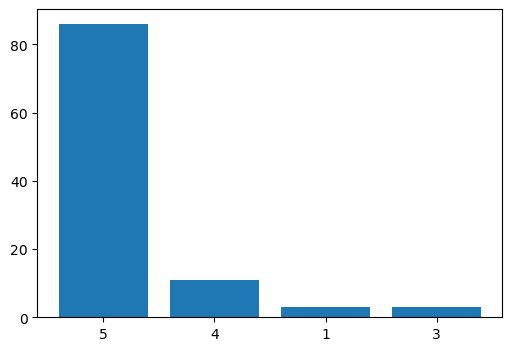

In [51]:
x = df_clean['star_rating'].unique()
y = df_clean['star_rating'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(x,y)
plt.show()

In [52]:
df_clean['sentiment_score'].describe()

count    103.000000
mean       0.998638
std        0.000577
min        0.995493
25%        0.998602
50%        0.998829
75%        0.998890
max        0.999507
Name: sentiment_score, dtype: float64

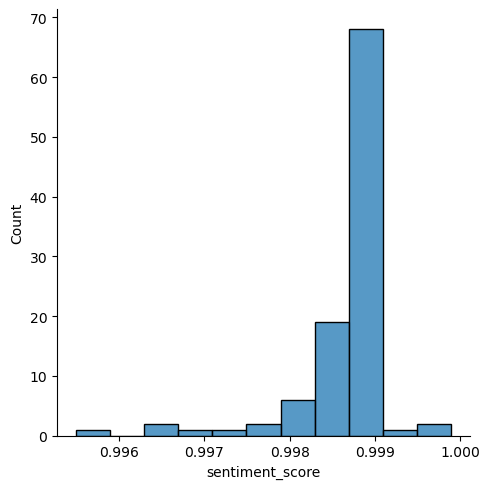

In [53]:
bin_edges = np.arange(df_clean['sentiment_score'].min(),df_clean['sentiment_score'].max()+0.0004, 0.0004)
sb.displot(df_clean['sentiment_score'], bins=bin_edges)

<AxesSubplot: ylabel='star_rating'>

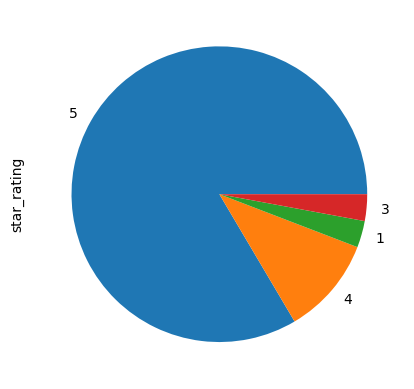

In [54]:
df_clean['star_rating'].value_counts().plot(kind='pie')

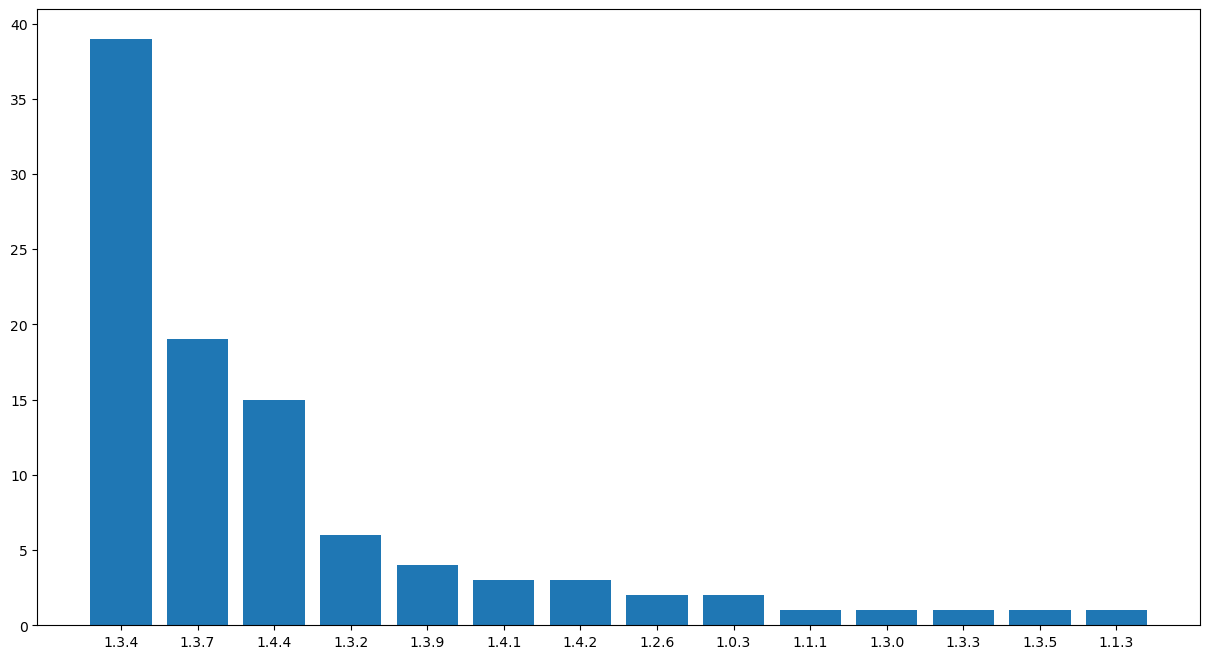

In [55]:
x = df_clean[df_clean['app_version'] != 'nan']['app_version'].unique()
y = df_clean[df_clean['app_version'] != 'nan']['app_version'].value_counts()

plt.figure(figsize=(15,8))
plt.bar(x,y)
plt.show()

In [56]:
df_clean['year'] = df_clean['date'].dt.year

In [57]:
df_clean.sample(5)

,username,star_rating,date,review_content,thumbsup,device,app_version,sentiment_label,sentiment_score,year
review_id,,,,,,,,,,
f1fc09c7-b3c1-46fa-833b-ba07d2f67eb6,Cecile Perret,5,2020-10-19,I really like this app and its partner apps (c...,40,Phone,1.3.7,positive,0.998935,2020
cd7f4616-3ffe-4cb7-8217-854b2e05478a,Astro Biological,5,2022-10-16,Very useful for a student such as myself,NaN,Phone,1.4.4,positive,0.998661,2022
c9cf3f0d-e1b3-4f17-a0b7-6e94883cee04,Josh Shoesmith,4,2020-10-21,It is and good way to learn and keep up your h...,1,Phone,1.3.7,positive,0.998879,2020
c06a6a0b-0a83-427c-bf67-6b981a4b8589,Cathy Furman,4,2023-02-19,"App works well, some bugs here and there with ...",17,Phone,1.4.4,positive,0.998915,2023
dc82d38c-ff68-49e9-b82f-805467491e82,Tapas Sarkar,5,2021-09-08,ultimate to learn html,NaN,Phone,1.4.1,positive,0.997675,2021


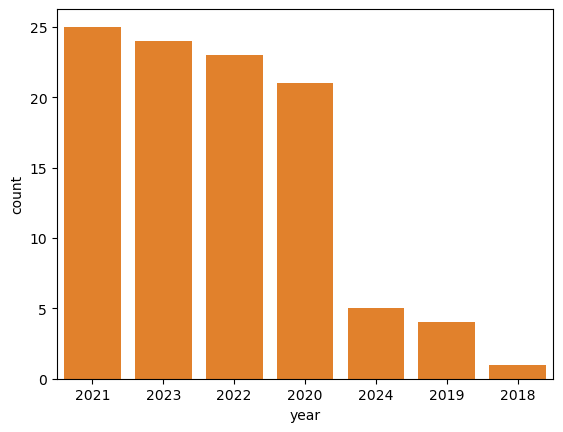

In [62]:
ordering = df_clean['year'].value_counts(ascending=False).index
sb.countplot(data=df_clean, x='year', color = sb.color_palette()[1], order=ordering)
plt.show()

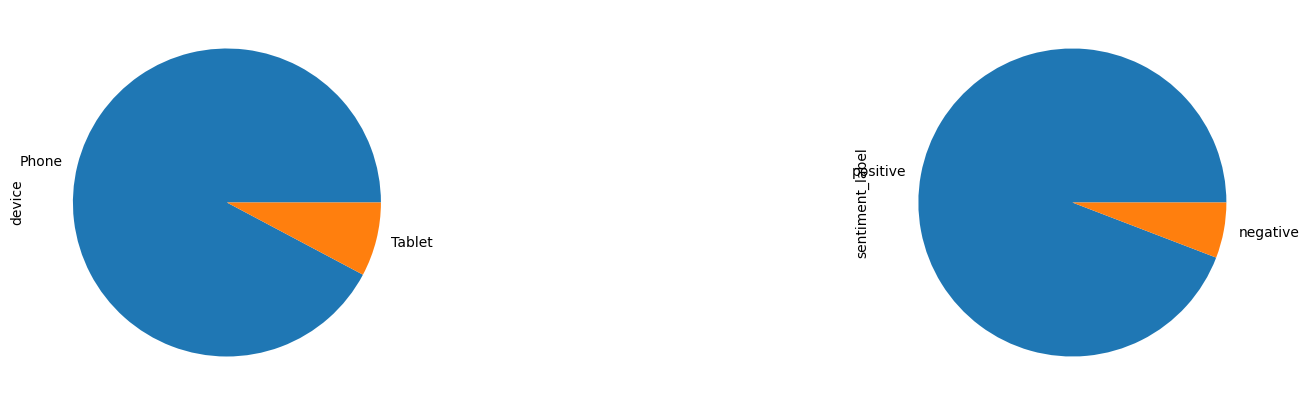

In [63]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
df_clean['device'].value_counts().plot(kind='pie')

plt.subplot(1,2,2)
df_clean['sentiment_label'].value_counts().plot(kind='pie')
plt.show()

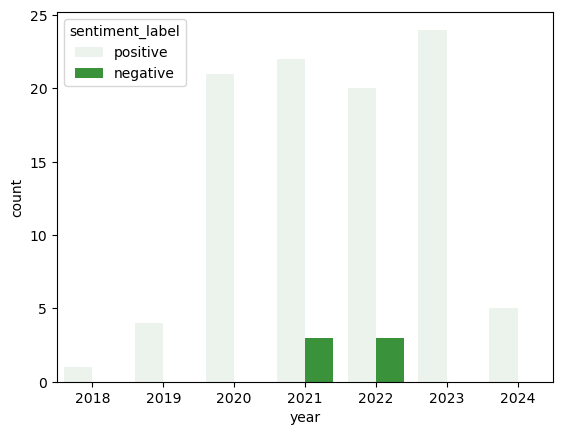

In [67]:
sb.countplot(data=df_clean, x='year',hue= 'sentiment_label',color = sb.color_palette()[2])
plt.show()